# Chapter8.  교차분석(카이제곱 검정)

## 분할표와 독립성 검정

Overview of Statistical Tests

![Google Logo](https://miro.medium.com/v2/resize:fit:720/format:webp/1*iqz1kn5uwIeGIrc3Xcv73g.png)

**교차분석(cross-tabulation)** 은 두 개 이상의 범주형 변수에 대한 데이터를 표 형태로 정리하여 분석하는 과정입니다.   
이 표는 각 변수들의 각 수준별로 빈도를 보여줍니다.

**카이제곱검정(Chi-square test)**은 범주형 변수들 간의 관계를 검증하기 위한 통계적 방법 중 하나입니다.    
주로 두 가지 이상의 범주형 변수들 간에 독립성을 확인하는 데 사용됩니다. 

카이제곱검정을 사용하여 교차분석 결과의 통계적 유의성을 검정할 수 있습니다.   
이를 통해 변수들 간의 **관계가 우연에 의한 것인지**, 아니면 실제로 **통계적으로 유의한 관련성이 있는지**를 판단할 수 있습니다.

![Google Logo](https://www.researchgate.net/profile/Duruo-Huang-2/publication/276964817/figure/fig2/AS:614265107017738@1523463622461/Schematic-diagram-showing-some-more-essence-of-the-chi-square-test-given-small.png)


### 카이제곱검정 과정

1. 가설 설정: 교차분석에서 다루는 변수들 간의 독립성에 대한 귀무가설과 대립가설을 설정합니다.   
일반적으로 귀무가설은 "변수들은 독립적이다"를 의미하며, 대립가설은 "변수들은 독립적이지 않다"를 의미합니다.   
</br>


2. 예상 빈도 계산: 교차표에서 기대되는(예상되는) 빈도를 계산합니다.  
이는 전체 데이터의 빈도와 각 범주 간의 기대 비율을 사용하여 계산됩니다.   
</br>


3. 카이제곱 통계량 계산: 실제 관찰된 빈도와 예상 빈도 간의 차이를 측정하여 카이제곱 통계량을 계산합니다.  
이는 각 셀의 (관찰된 빈도 - 예상 빈도)² / 예상 빈도를 모두 합산하여 구합니다.     
</br>


4. 유의확률 계산: 카이제곱 통계량을 이용하여 유의확률( p-value)을 계산합니다.  
이는 자유도와 함께 카이제곱 분포를 사용하여 계산됩니다.   
</br>


5. 결과 해석: 유의확률을 통해 귀무가설을 기각할지 말지를 결정합니다.   
유의수준(일반적으로 0.05)보다 유의확률이 작으면 귀무가설을 기각하고, 변수들 간에는 통계적으로 유의한 관련성이 있다고 결론짓습니다.   
</br>

카이제곱검정을 통해 교차분석 결과의 통계적 유의성을 평가함으로써, 변수들 간의 관계를 더 잘 이해하고 추론할 수 있습니다.

In [1]:
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

확률밀도함수(Probability Density Function, PDF)와 누적밀도함수(Cumulative Density Function, CDF)는 확률론과 통계학에서 사용되는 중요한 개념입니다.

### 1. 확률 밀도 함수(Probability Density Function)

확률변수가 특정 값에서 발생할 확률의 밀도를 나타내는 함수입니다. 이는 연속형 확률 변수에 대해 정의됩니다. 확률변수가 특정 값에서 발생할 확률을 정확하게 나타내는 것이 아니라, 그 주변의 밀도를 보여줍니다. PDF는 확률을 직접 나타내지 않지만, 특정 구간에서의 확률 밀도를 제공하여 해당 구간에서 사건이 발생할 가능성을 보여줍니다. 밀도는 질량을 구간의 크기로 나눈 값으로 생각할 수 있습니다.

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

여기서:

- x는 확률 변수의 값,
- μ는 평균,
- σ는 표준 편차,
- π는 원주율,
- e는 자연 상수(약 2.71828)입니다.

**확률밀도함수 (PDF)의 3가지 특성**

첫째, 항상 양의 값을 가진다.
$$
f(x) \geq 0
$$

둘째, 확률 밀도 함수의 정의된 범위 내에서의 합은 1이 된다.
$$
\int_{-\infty}^{\infty} f(x) dx = 1
$$

셋째, 정의된 범위 내에서의 확률은 PDF의 영역 넓이(적분값)가 된다
$$
P(a \leq X \leq b) = \int_{a}^{b} f(x) dx
$$

### 2. 누적 분포 함수(Cumulative Distribution Function, CDF)

누적분포함수(Cumulative Distribution Function, CDF)는 확률 변수가 **특정 값보다 작거나 같은 확률**을 제공하는 함수입니다.     
수식적으로, 확률 변수 X의 CDF는 다음과 같이 정의됩니다:

$$F(x) = P(X \leq x)$$

**2. 누적밀도함수 (CDF)** : 확률변수가 특정 값보다 작거나 같을 확률을 나타내는 함수입니다. 이는 연속형 및 이산형 확률 변수 모두에 대해 정의됩니다. 누적밀도함수는 확률변수가 특정 값 이하의 값을 가질 확률을 누적하여 보여줍니다. CDF는 확률을 누적하여 계산하므로, 특정 값보다 작거나 같은 확률을 제공합니다. 이는 어느 값이 더 자주 나오는지 한눈에 파악하기는 어려우나, 각 구간의 확률을 알 수 있습니다.

이제 파이썬을 사용하여 누적밀도함수(CDF)와 확률밀도함수(PDF)를 그래프로 그려보겠습니다. 이를 위해 파이썬의 scipy.stats 모듈을 사용하여 정규분포를 예시로 들어보겠습니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#  그래프 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

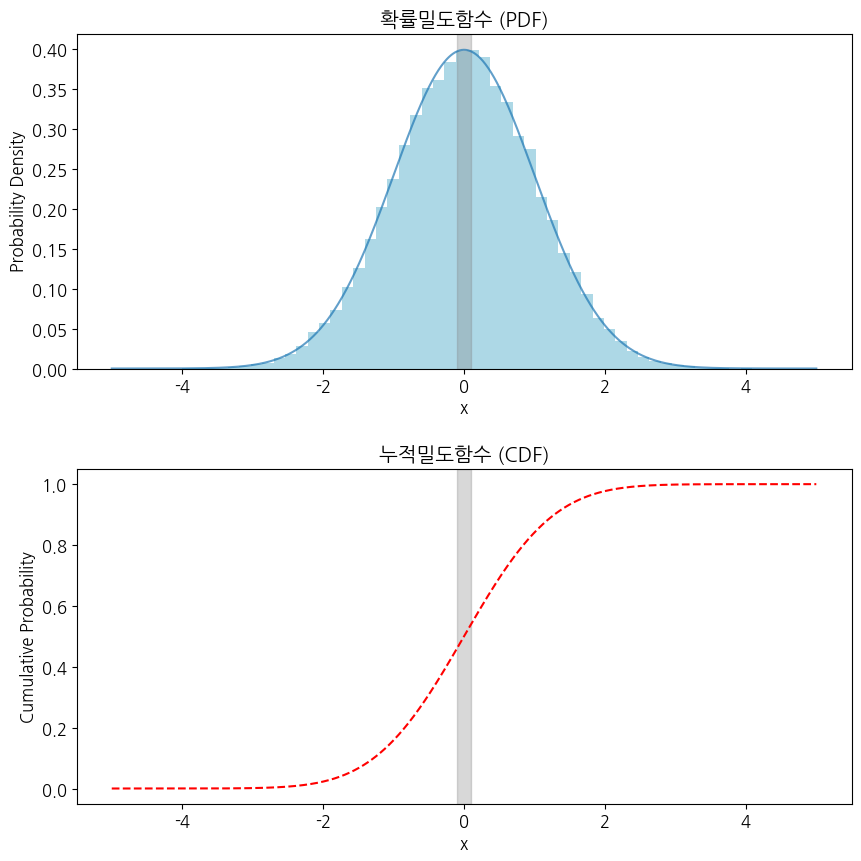

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규분포를 따르는 확률 변수 생성

mu1, sigma1 = 0.0, 1.0
x = np.linspace(-5, 5, 1000)
y = (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x-mu1)**2 / (2 * sigma1**2))

plt.figure(figsize=(10, 10))

# PDF 그래프 (히스토그램)
plt.subplot(2, 1, 1)
plt.plot(x, y, alpha=0.7, label=r'PDF of N(0, $1^2$)')

# 데이터로부터 계산된 히스토그램
y_hist = np.random.normal(mu1, sigma1, 50000)
plt.hist(y_hist, bins=50, density=True, histtype='stepfilled', label=r'random.normal(0, $1^2$)', color='lightblue',)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5.5, 5.5)
# plt.legend(ncol=2, bbox_to_anchor=(1.0, -0.2))
plt.axvspan(-0.1, 0.1, color='gray', alpha=0.3)  # 특정 구간 음영 표시

plt.title('확률밀도함수 (PDF)')
plt.xlabel('x')
plt.ylabel('Probability Density')

# CDF 그래프 (점선)
plt.subplot(2, 1, 2)
cdf = norm.cdf(x, mu1, sigma1)

plt.plot(x, cdf, linestyle='--', color='red', label='CDF of N(0, $1^2$)')

plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.axvspan(-0.1, 0.1, color='gray', alpha=0.3)  # 특정 구간 음영 표시

plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('누적밀도함수 (CDF)')

# 서브플롯 간 수직 공백 조절
plt.subplots_adjust(hspace=0.3)
plt.show()


### p-값 계산

In [4]:
# 자유도 (df; degree of freedom) 가 1인 카이제곱 분포의 누적밀도함수(cdf )

1 - sp.stats.chi2.cdf(x = 12.373, df = 1)

0.0004355871468397776

>p 값이 0.05 보다 작으므로 색에 따라 유의미 하다고 판단 가능

### 분할표 검정

In [5]:
df = pd.read_csv('data.csv')

In [6]:
import pandas as pd
import numpy as np

# 업체명과 불량여부를 담은 리스트 생성
company_list = ['A'] * 1000 + ['B'] * 9000
defect_list = ['normal'] * 9900 + ['defective'] * 100

# 불량여부 랜덤하게 섞기
np.random.shuffle(defect_list)

# 데이터프레임 생성
df = pd.DataFrame({'Company': company_list, 'Defect': defect_list})

# 데이터프레임 출력
print(df.head())

  Company  Defect
0       A  normal
1       A  normal
2       A  normal
3       A  normal
4       A  normal


In [7]:
# 업체명(A, B)과 불량여부(정상, 불량)에 대한 교차분할표 생성
cross_table = pd.crosstab(df['Company'], df['Defect'])

# 교차분할표 출력
print("\nCross Table:")
print(cross_table)


Cross Table:
Defect   defective  normal
Company                   
A                5     995
B               95    8905


In [8]:
# 카이제곱 검정
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_table)
print("\nChi-squared Test:")
print("Chi2:", chi2)
print("p-value:", p)
print("Degree of Freedom:", dof)


Chi-squared Test:
Chi2: 2.272727272727273
p-value: 0.13166801602281455
Degree of Freedom: 1


In [9]:
np.sqrt(chi2)

1.5075567228888183

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

while True:
    # 업체명과 불량여부를 담은 리스트 생성
    company_list = ['A'] * 1000 + ['B'] * 9000
    defect_list = ['normal'] * 9900 + ['defective'] * 100

    # 불량여부 랜덤하게 섞기
    np.random.shuffle(defect_list)

    # 데이터프레임 생성
    df = pd.DataFrame({'Company': company_list, 'Defect': defect_list})

    # 업체명(A, B)과 불량여부(정상, 불량)에 대한 교차분할표 생성
    cross_table = pd.crosstab(df['Company'], df['Defect'])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_table)
    
    # P값이 0.05 이하인 경우에만 반복문 탈출
    if p <= 0.05:
        break

# 데이터프레임 출력
print(df.head())

# 교차분할표 출력
print("\nCross Table:")
print(cross_table)

# 카이제곱 검정 결과 출력
print("\nChi-squared Test:")
print("Chi2:", chi2)
print("p-value:", p)
print("Degree of Freedom:", dof)

# CSV 파일로 데이터 저장
df.to_csv('data.csv', index=False)
print("Data saved to 'data.csv'")


  Company  Defect
0       A  normal
1       A  normal
2       A  normal
3       A  normal
4       A  normal

Cross Table:
Defect   defective  normal
Company                   
A               18     982
B               82    8918

Chi-squared Test:
Chi2: 6.313131313131313
p-value: 0.011984698922786726
Degree of Freedom: 1
Data saved to 'data.csv'
